### Imports

In [1]:
# data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

In [2]:
# set the start date and end date.
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,1,1)

# set each bank to be a separate dataframe
BAC = data.DataReader("BAC", 'yahoo', start, end)
C = data.DataReader("C", 'yahoo', start, end)
GS = data.DataReader("GS", 'yahoo', start, end)
JPM = data.DataReader("JPM", 'yahoo', start, end)
MS = data.DataReader("MS", 'yahoo', start, end)
WFC = data.DataReader("WFC", 'yahoo', start, end)



In [3]:
# preview one dataframe
BAC.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806

Let's create a list of the ticker symbols (as strings) in alphabetical order.

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

Use `pd.concat` to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
# bank_stocks

Set the column name levels:

In [6]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.442013  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.486385  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.434616  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.456806  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.867344  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.892612  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  36.993786  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.031731  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.423725  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

In [7]:
bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    139.399994
MS      89.300003
WFC     65.930000
dtype: float64

In [8]:
C['Close'].idxmax()

Timestamp('2006-12-27 00:00:00')

In [9]:
# empty dataframe
returns = pd.DataFrame()

In [10]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head(3)

BAC Return  C Return  GS Return  JPM Return  MS Return  WFC Return
Date                                                                          
2006-01-03         NaN       NaN        NaN         NaN        NaN         NaN
2006-01-04   -0.010620 -0.018462  -0.013812   -0.014183   0.000686   -0.011599
2006-01-05    0.001288  0.004961  -0.000393    0.003029   0.002742   -0.001110

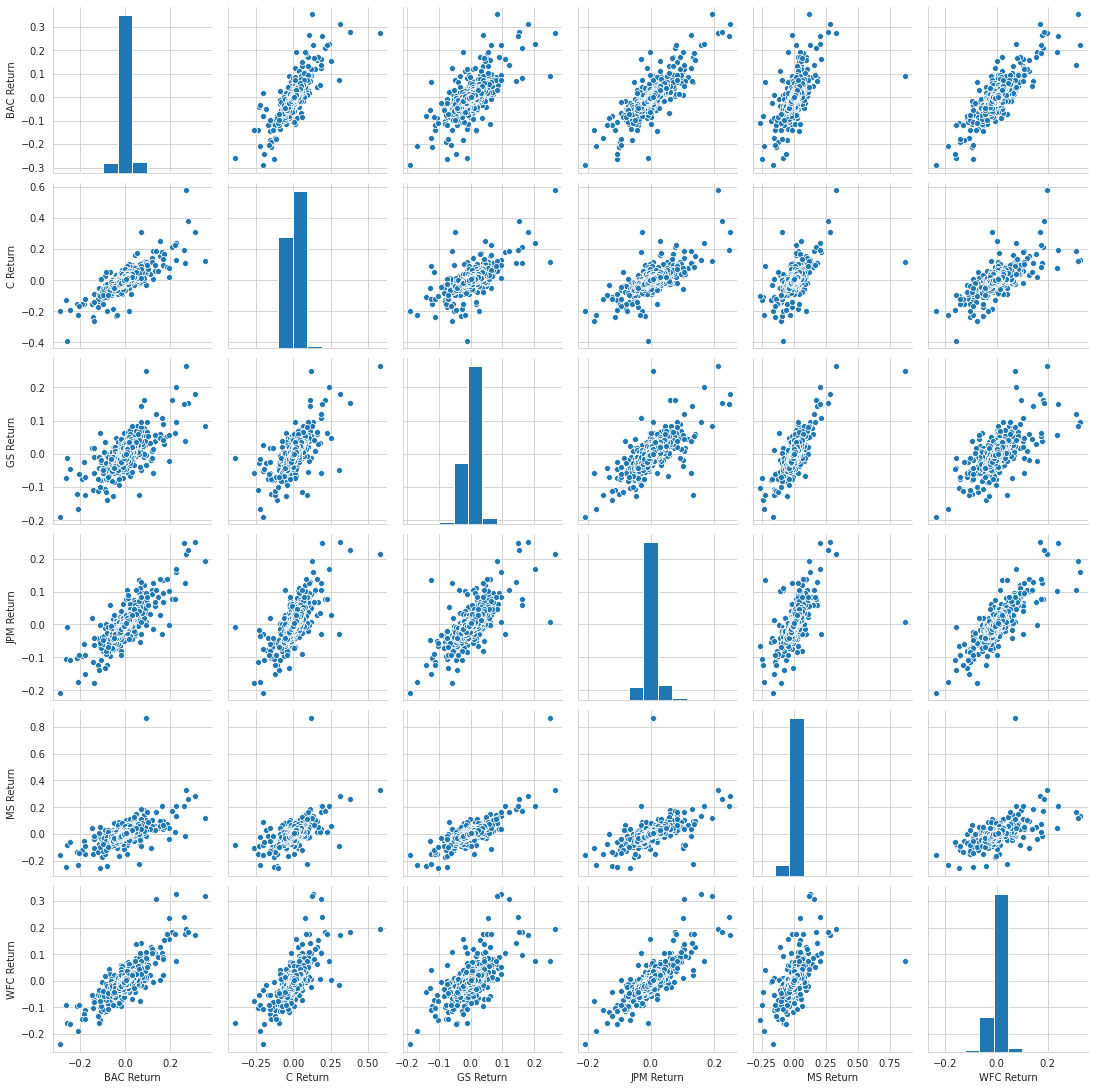

In [11]:
sns.pairplot(returns[1:])

In [12]:
# Biggest single day losses
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

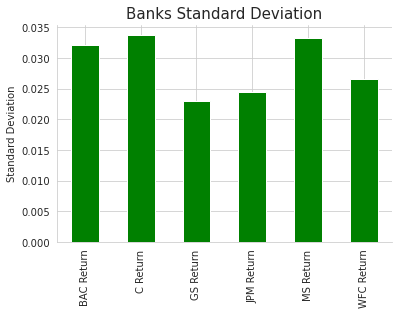

In [13]:
# Standard Deviation 
returns.std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('Banks Standard Deviation', fontsize=15)
sns.despine()

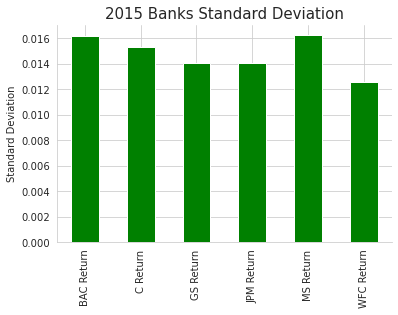

In [14]:
# 2015 Standard Deviation
returns.loc['2015-01-01':'2015-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2015 Banks Standard Deviation', fontsize=15)
sns.despine()

Text(0, 0.5, 'Numbers of Returns')

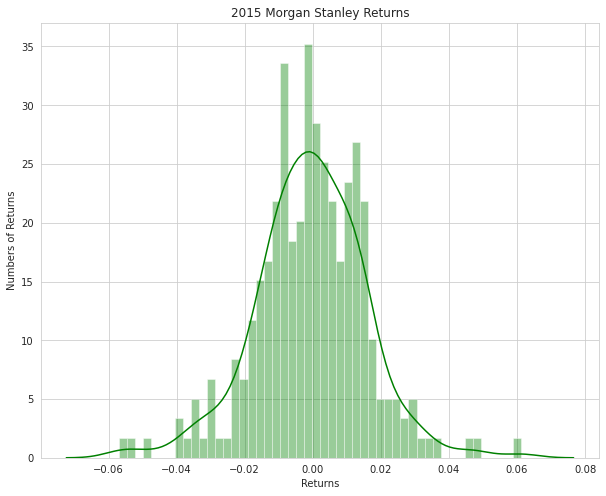

In [15]:
plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)
ax.set_title('2015 Morgan Stanley Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

Text(0, 0.5, 'Numbers of Returns')

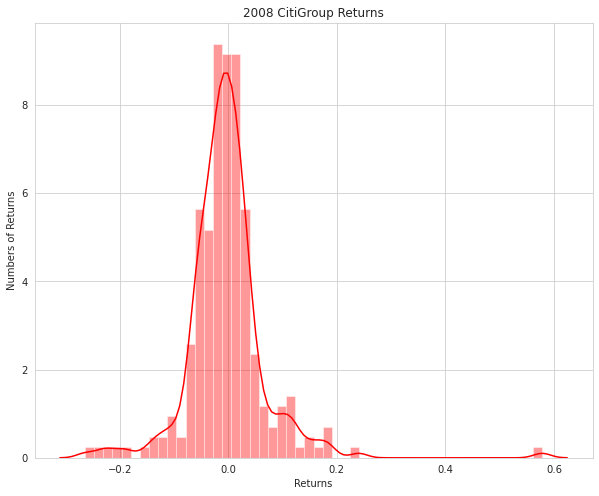

In [16]:
plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)
ax.set_title('2008 CitiGroup Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

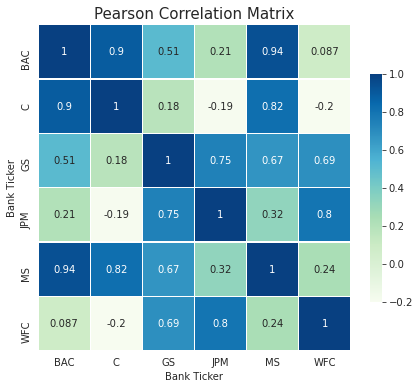

In [17]:
plt.figure(figsize=(7,6))
plt.title('Pearson Correlation Matrix',fontsize=15)
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='GnBu',
            linewidths=0.25, linecolor='w', cbar_kws={"shrink": .7})

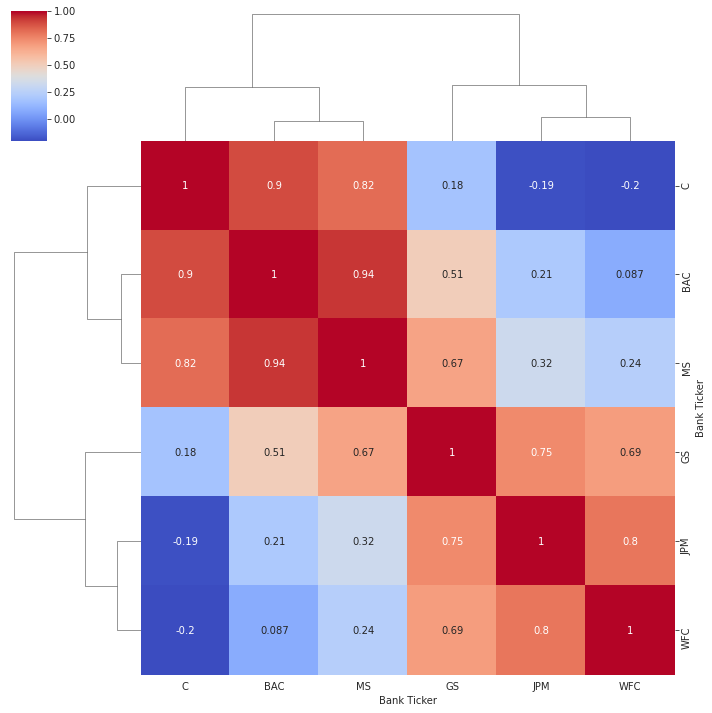

In [18]:
sns.clustermap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')

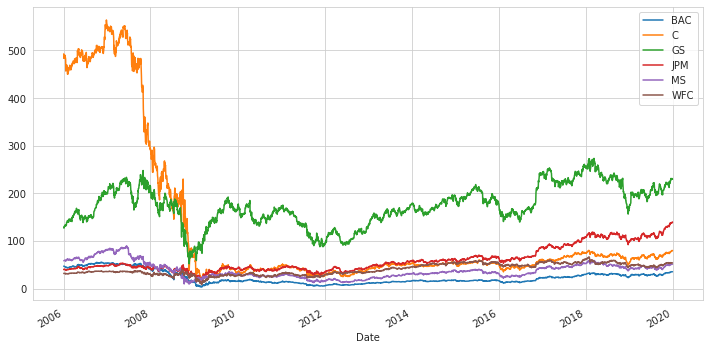

In [19]:
# Option N°1
for tick in tickers:
    bank_stocks[tick]['Close'].plot(label=tick, figsize=(12,6))
plt.legend()

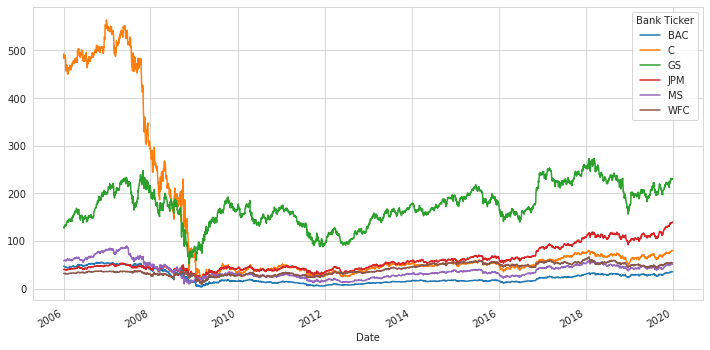

In [20]:
# Option N°2
bank_stocks.xs('Close', axis=1, level='Stock Info').plot(figsize=(12,6))

[Plotly](https://plotly.com/) provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.

In [21]:
# Option N°3
bank_stocks.xs('Close', axis=1, level='Stock Info').iplot(xTitle='Date', yTitle='Close Price', title='Cufflinks - Close Price for Each Bank')

In [22]:
fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['BAC Return'], nbinsx=50, name="BAC")
trace1 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['C Return'], nbinsx=50, name="C")
trace2 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['GS Return'], nbinsx=50, name="GS")
trace3 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['JPM Return'], nbinsx=50, name="JPM")
trace4 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['MS Return'], nbinsx=50, name="MS")
trace5 = go.Histogram(x=returns.loc['2018-01-01':'2019-12-31']['WFC Return'], nbinsx=50, name="WFC")

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.update_layout(title_text='Banks Returns (2018 - 2019)')

fig.show()

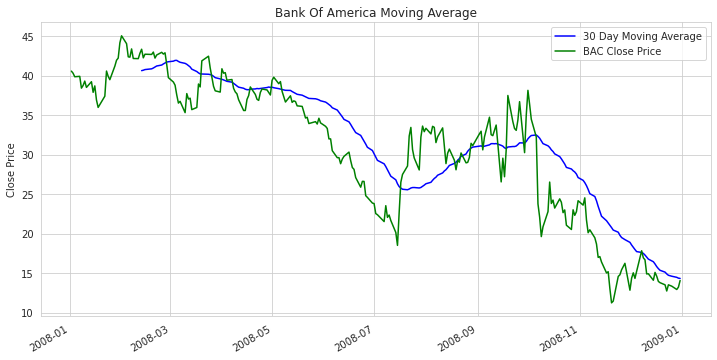

In [23]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(color='blue', label='30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2008-12-31'].plot(color='green', label='BAC Close Price')
plt.ylabel('Close Price')
plt.xlabel('')
plt.title('Bank Of America Moving Average')
plt.legend()


In [24]:
BAC['Close'].loc['2008-01-01':'2008-12-31'].iplot(fill=True,colors=['green'])

In [25]:
MS.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='sma', periods=[13,21,55])

In [26]:
# Bank of America Candlestick Chart
fig = go.Figure(data=[go.Candlestick(x=BAC.index,
                open=BAC['Open'],
                high=BAC['High'],
                low=BAC['Low'], 
                close=BAC['Close'])
                ])

fig.update_layout(
    title='Bank of Amercia Stock Price',
    yaxis_title='BAC Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Subprime Mortgage Crisis')]
)

fig.show()

Use `.iplot(kind='candle)` to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.

In [27]:
# Bank of America Candlestick Chart
BAC[['Open', 'High', 'Close', 'Low']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle', 
                                                                           title='Bank of Amercia Stock Price', 
                                                                           yaxis_title='BAC Stock')

In [28]:
BAC.loc['2015-01-01':'2016-01-01']['Close'].ta_plot(study='boll',periods=14, title='Bollinger Bands')

In [29]:
fig = px.area(bank_stocks.xs(key='Close', axis=1, level='Stock Info'), facet_col="Bank Ticker", facet_col_wrap=2)
fig.show()

In [30]:
# Citigroup OHLC Chart
fig = go.Figure(data=go.Ohlc(x=C.index,
                    open=C['Open'],
                    high=C['High'],
                    low=C['Low'],
                    close=C['Close']))

fig.update_layout(
    title='Citigroup Stock Price',
    yaxis_title='C Stock',
    shapes = [dict(
        x0='2009-01-20', x1='2009-01-20', y0=0, y1=1, xref='x', yref='paper', line_width=2),
             dict(
        x0='2007-12-01', x1='2007-12-01', y0=0, y1=1, xref='x', yref='paper', line_width=2)],
    annotations=[dict(
        x='2009-01-20', y=0.95, xref='x', yref='paper',
        showarrow=False, xanchor='left', text='President Obama Took Office'), 
                 dict(
        x='2007-12-01', y=0.1, xref='x', yref='paper',
        showarrow=False, xanchor='right', text='Subprime Mortgage Crisis')]
)

fig.show()